<a href="https://colab.research.google.com/github/SzuHannah/blending-stochastic/blob/main/Advopt_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
%pip install gurobipy

     |████████████████████████████████| 11.5 MB 6.5 MB/s 


In [30]:
import numpy as np
import gurobipy as grb
import scipy.stats as stat
from tqdm.notebook import trange
import matplotlib.pyplot as plt
plt.style.use('default')

### one quality measure, two raw materials, and one product

### moreau envelope obj

In [24]:
#N_seq = [10, 50, 100, 400]; # number of samples
N_seq = [10, 50, 100, 500, 1000, 10000, 20000]; # numb of samples
M = 10; # numb of replication
Nprim = 1000;
alpha = 0.05;
eps = 0.001;
# feasible region of Qx-b
lb = 0
ub = 10.21
seq = np.zeros(len(N_seq));
me_seq = np.zeros(len(N_seq)); 
ci_up_seq = np.zeros(len(N_seq));
ci_low_seq = np.zeros(len(N_seq));
ci= np.zeros(len(N_seq));

x_id = [1,2]
for s in range(len(N_seq)):
    N = N_seq[s];
    print("######################## Sample size (", N, ") ########################");
    obj = np.zeros(M);
    #UB_obj = np.zeros(M);
    
    # M replication experiments
    for rep_m in trange(M):
        # lower bound ###############################################################################
        # N independent parameter samples
        e1 = np.random.uniform(16.768,16.982,N) ;
        e2 = np.random.uniform(14.540,15.656, N)
        exp = 0; # each replication
        mu = 0.01 # control step size

        # model
        model = grb.Model('SAA_mor', env = e);
        model.setParam('OutputFlag', 0)
        
        # variables
        x = {}
        # for k in x_id:
        for j in range(N):
          x[1,j] = model.addVar(lb=0,ub=0.34,name="x(%s_%s)" % (1,j))
          x[2,j] = model.addVar(lb=0,ub=0.60,name="x(%s_%s)" % (2,j))

        model.update()

        # Define Objective & constraints
        for k in range(N):
          t = model.addVar()
          model.addConstr(t == e1[k]*x[1,k]+e2[k]*x[2,k]-5.75)

          ##Projection of Qx-b to [0,ub]: min{max{Qx-b,lb},ub}
          #max (Qx,lb+b) = u
          u = model.addVar()
          model.addGenConstrMax(u,[t],lb)


          #min (u, ub) = v
          v = model.addVar()
          model.addGenConstrMin(v,[u],ub)

          ## minimize distance of current Qx-b to projection
          d = model.addVar()
          model.addConstr(d == ((t-v)**2)/2)

          model.addConstr(69.97 * x[1,k] + 56.80 * x[2,k] <= 100)
          model.addConstr(x[1,k] + x[2,k] >= 0.3)

        ds = model.getVars()
        model.setObjective(grb.quicksum(ds)*1.0/N, grb.GRB.MINIMIZE)

        model.setParam('NonConvex', 2)
        model.optimize()

        xval ={}
        for i,xv in enumerate(x_id):
            xval[xv] = model.getAttr('x', x).values()[i];
        exp = model.objVal;
        obj[rep_m] = exp;
        print(xval)

    seq[s] = sum(obj)*1.0/M;
    print("Moreau Bound = ", seq[s]);
    var = sum([np.square(obj[k]-seq[s]) for k in range(M)]) *1.0/(M-1);
    print("Moreau Bound Variance = ", var);
    # marginal error
    me = (stat.norm.ppf(1-alpha)*np.power(var,1/2))*1.0/(np.power(M,1)/2);
    ci[s] = me
    ci_up_seq[s]  = seq[s] + me;
    ci_low_seq[s] = seq[s] - me;
    print("CI of Moreau Bound = [", ci_low_seq[s]," , ", ci_up_seq[s],"]");


######################## Sample size ( 10 ) ########################


  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33911235652741917, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.002124278449212702}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.002871710630596991}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0014130608682318968}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0008067687235397969}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0019178684595446693}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0024414739467064628}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0017725618

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33933119976671766, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.00037870990693500417}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3397969535983996, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33904253862910905, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0008108836751908877}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33986782219923645, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0011139008446482412}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.00028229187218486

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33988257163903746, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0015780673686373037}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33902237830942356, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0023966264042845076}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3388624932899067, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3398770394948898, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0023576686394148894}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0017590022307105713

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3392577203388079, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3393663745697479, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33957721523093215, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0025201192828946395}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.339019727861547, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 8.16183363038198e-05}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0023948383752218083}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0004826113467796267}
A

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0025113487978911664}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0029761804909655964}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3393264464206187, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.00197773251885347}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33912929020435933, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33888966724726777, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0020188865998431726}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.00117807316891604

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.002585183786493972}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0002943532268584459}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33933506493284976, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0007392492659826777}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3399403417481401, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3390189779040209, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0028812336714784115}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3387088055360081, 2: 0.0}


  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0026878846313523885}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3389479467668834, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.00017904815633185134}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0025171773994919766}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0027869788495534786}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.339241069500677, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.00250931843905855}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.000753322650821

#### CI plot

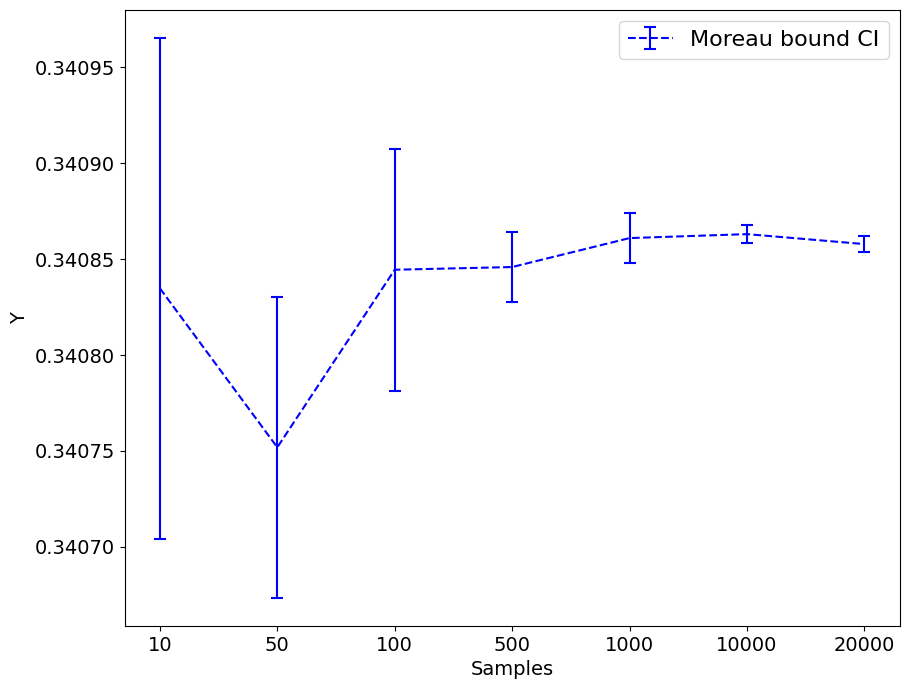

In [31]:
fig =  plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('Samples', fontsize = 14)
ax.set_ylabel('Y', fontsize = 14)
ax.yaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(labelsize=14)
# ax.axis([0, 5, 0, 35])
linestyle = {"linestyle":"--", "linewidth":1.5, "markeredgewidth":1.5, "elinewidth":1.5, "capsize":4}
# ax.errorbar([str(N_seq[i]) for i in range(len(N_seq))], UB_seq, yerr = UB_ci, color="r", **linestyle)
ax.errorbar([str(N_seq[i]) for i in range(len(N_seq))], seq, yerr = ci, color="b", **linestyle)
#ax.legend(['Upper bound CI','Lower bound CI'], fontsize  = 16)
ax.legend(['Moreau bound CI'], fontsize  = 16)
plt.show()

### cVAR obj

In [27]:
#N_seq = [10, 50, 100, 400]; # number of samples
N_seq = [10, 50, 100, 500, 1000, 10000, 20000]; # numb of samples
M = 10; # numb of replication
Nprim = 1000;
alpha = 0.05;
eps = 0.001;

cv_seq = np.zeros(len(N_seq));
cv_me_seq = np.zeros(len(N_seq)); 
cv_ci_up_seq = np.zeros(len(N_seq));
cv_ci_low_seq = np.zeros(len(N_seq));
cv_ci= np.zeros(len(N_seq));

x_id = [1,2]
for s in range(len(N_seq)):
    N = N_seq[s];
    print("######################## Sample size (", N, ") ########################");
    cv_obj = np.zeros(M);
    UB_obj = np.zeros(M);
    
    # M replication experiments
    for rep_m in trange(M):
        # lower bound ###############################################################################
        # N independent parameter samples
        e1 = np.random.uniform(16.768,16.982,N) ;
        e2 = np.random.uniform(14.540,15.656, N)
        cv_exp = 0; # each replication
        
        # model
        cv_model = grb.Model('SAA_cv', env = e);
        cv_model.setParam('OutputFlag', 0)
        
        # variables
        x = {}
        # for k in x_id:
        for j in range(N):
          x[1,j] = cv_model.addVar(lb=0,ub=0.34,name="x(%s_%s)" % (1,j))
          x[2,j] = cv_model.addVar(lb=0,ub=0.60,name="x(%s_%s)" % (2,j))

        cv_model.update()

        # Define Objective & constraints
        for k in range(N):
          t = cv_model.addVar()
          cv_model.addConstr(t == e1[k]*x[1,k]+e2[k]*x[2,k]-5.75+eps)

          #max
          u = cv_model.addVar()
          cv_model.addGenConstrMax(u,[t],0)
          ue = cv_model.addVar()
          cv_model.addConstr(ue == u/eps)

          cv_model.addConstr(69.97 * x[1,k] + 56.80 * x[2,k] <= 100)
          cv_model.addConstr(x[1,k] + x[2,k] >= 0.3)
        ues = cv_model.getVars()
        cv_model.setObjective(grb.quicksum(ues)*1.0/N, grb.GRB.MINIMIZE)

        cv_model.optimize()
        xval ={}
        for i,xv in enumerate(x_id):
            xval[xv] = cv_model.getAttr('x', x).values()[i];
        cv_exp = cv_model.objVal;
        cv_obj[rep_m] = cv_exp;
        print(xval)

    cv_seq[s] = sum(cv_obj)*1.0/M;
    print("cVAR Bound = ", cv_seq[s]);
    cv_var = sum([np.square(cv_obj[k]-cv_seq[s]) for k in range(M)]) *1.0/(M-1);
    print("cVAR Bound Variance = ", cv_var);
    # marginal error
    cv_me = (stat.norm.ppf(1-alpha)*np.power(cv_var,1/2))*1.0/(np.power(M,1)/2);
    cv_ci[s] = cv_me
    cv_ci_up_seq[s]  = cv_seq[s] + cv_me;
    cv_ci_low_seq[s] = cv_seq[s] - cv_me;
    print("CI of cVAR Bound = [", cv_ci_low_seq[s]," , ", cv_ci_up_seq[s],"]");


######################## Sample size ( 10 ) ########################


  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.338846007071409, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.003104407131731657}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3388599658937669, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0007139506538327746}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0010263875475603479}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0008716730132106162}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33868388668979704, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.001521084540537121

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0008691281684187264}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0011951272195781515}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0017909146408195964}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0003466424980354897}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.338790924747128, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.00012666609979767408}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.00024743831536662257}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.00039263

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0025135034368616305}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0004239103292714538}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.000795870060290681}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0024940029660965868}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.001415499171109058}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.002953076634961249}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3396414870772649, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3397620175828646, 2: 

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33888196024027106, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33893633232106185, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0005100632649898594}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0025958621687672823}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33901280400566663, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3390171245885534, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33934312532065186, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 7.482875737699914e-05}


  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0012084199994072398}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.002399259487223304}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.003013249674724605}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 9.38204815124213e-05}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0011167387096905346}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3388076454031513, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0016695795819260395}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3391853751653042, 2: 

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.002251681637197356}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33888319961740987, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0028815624296008036}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0010568284794945093}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0016470917070954272}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0010100303031799207}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33912866469707587, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 7.997673798635

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33970132155646643, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.003035786991062439}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.00128370137330458}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33998782812619416, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0031781515795780146}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3391143796786324, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.002150479899216129}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33946044863073666, 2: 0.0}
A

#### CI plot

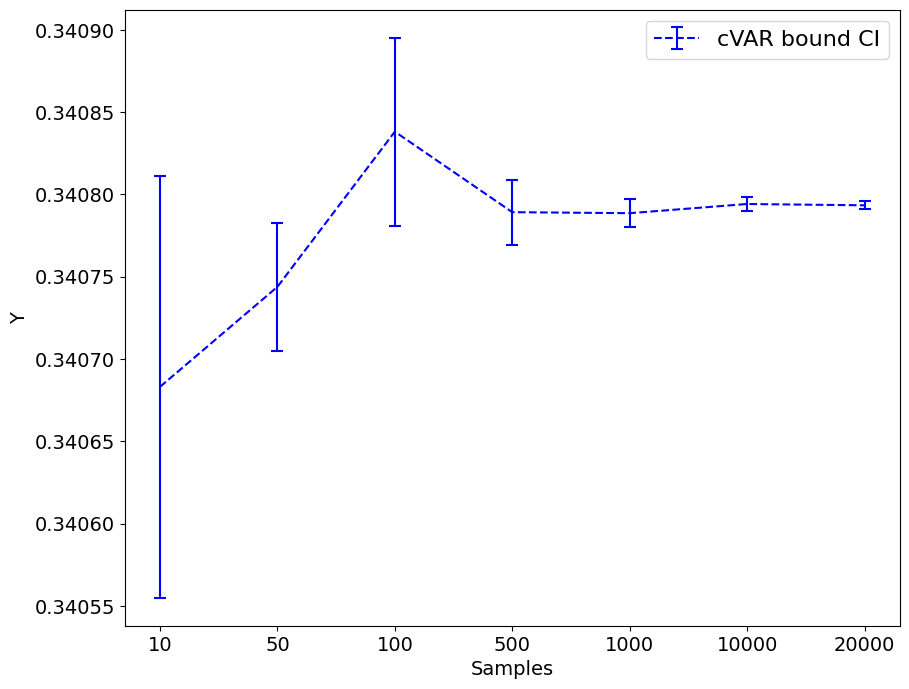

In [32]:
fig =  plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('Samples', fontsize = 14)
ax.set_ylabel('Y', fontsize = 14)
ax.yaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(labelsize=14)
# ax.axis([0, 5, 0, 35])
linestyle = {"linestyle":"--", "linewidth":1.5, "markeredgewidth":1.5, "elinewidth":1.5, "capsize":4}
# ax.errorbar([str(N_seq[i]) for i in range(len(N_seq))], UB_seq, yerr = UB_ci, color="r", **linestyle)
ax.errorbar([str(N_seq[i]) for i in range(len(N_seq))], cv_seq, yerr = cv_ci, color="b", **linestyle)
ax.legend(['cVAR bound CI'], fontsize  = 16)
plt.show()

#### plot CI from moreau and cVAR together

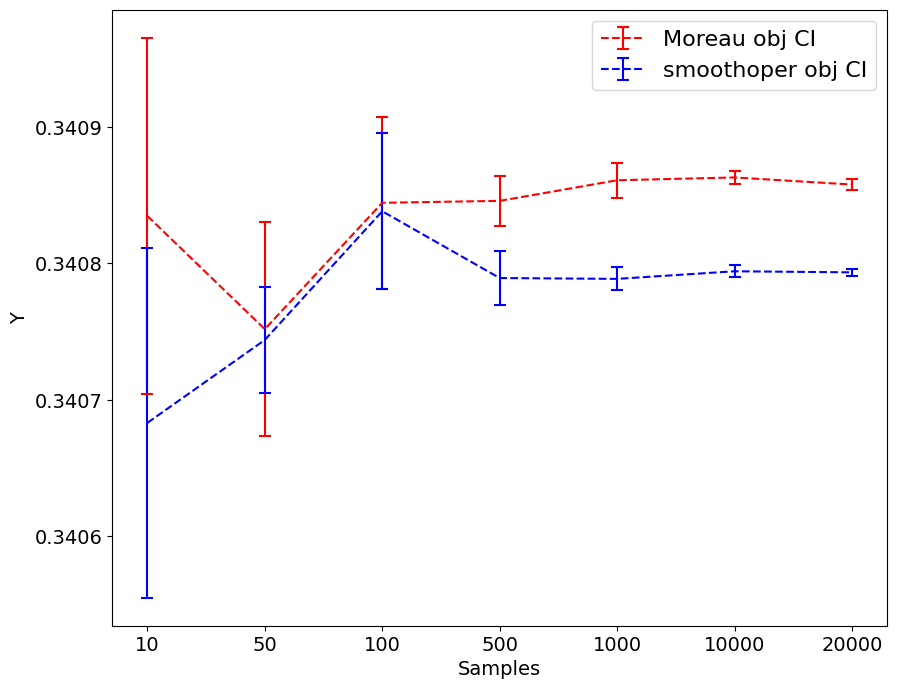

In [33]:
fig =  plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('Samples', fontsize = 14)
ax.set_ylabel('Y', fontsize = 14)
ax.yaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(labelsize=14)
# ax.axis([0, 5, 0, 35])
linestyle = {"linestyle":"--", "linewidth":1.5, "markeredgewidth":1.5, "elinewidth":1.5, "capsize":4}
ax.errorbar([str(N_seq[i]) for i in range(len(N_seq))], seq, yerr = ci, color="r", **linestyle)
ax.errorbar([str(N_seq[i]) for i in range(len(N_seq))], cv_seq, yerr = cv_ci, color="b", **linestyle)
ax.legend(['Moreau obj CI','smoothoper obj CI'], fontsize  = 16)
plt.show()

## One quality measure, 7 materials 1 product

### cVAR obj

In [37]:
#N_seq = [10, 50, 100]; # number of samples
N_seq = [10, 50, 100, 200, 500, 1000, 10000]; # numb of samples
M = 10; # numb of replication
Nprim = 1000;
alpha = 0.05;
eps = 0.0001;

LB_seq = np.zeros(len(N_seq));
LB_me_seq = np.zeros(len(N_seq)); 
LB_ci_up_seq = np.zeros(len(N_seq));
LB_ci_low_seq = np.zeros(len(N_seq));
LB_ci= np.zeros(len(N_seq));

x_id = [1,2,3,4,5,6,7]
for s in range(len(N_seq)):
    N = N_seq[s];
    print("######################## Sample size (", N, ") ########################");
    LB_obj = np.zeros(M);
    UB_obj = np.zeros(M);
    
    # M replication experiments
    for rep_m in trange(M):
        # lower bound ###############################################################################
        # N independent parameter samples
        e1 = np.random.uniform(16.768,16.982,N)
        e2 = np.random.uniform(14.540,15.656, N)
        e3 = np.random.uniform(15.232,17.202,N)
        e4 = np.random.uniform(15.232,17.202,N)
        e5 = np.random.uniform(15.160,17.892,N)
        e6 = np.random.uniform(14.510,17.648,N)
        e7 = np.random.uniform(10.250,13.680,N)
        LB_exp = 0; # each replication
        
        # model
        LB_model = grb.Model('SAA_LB',e);
        LB_model.setParam('OutputFlag', 0)
        
        # variables
        x = {}
        # for k in x_id:
        for j in range(N):
          x[1,j] = LB_model.addVar(lb=0,ub=0.34,name="x(%s_%s)" % (1,j))
          x[2,j] = LB_model.addVar(lb=0,ub=0.60,name="x(%s_%s)" % (2,j))
          x[3,j] = LB_model.addVar(lb=0,ub=0.11,name="x(%s_%s)" % (3,j))
          x[4,j] = LB_model.addVar(lb=0,ub=0.27,name="x(%s_%s)" % (4,j))
          x[5,j] = LB_model.addVar(lb=0,ub=0.25,name="x(%s_%s)" % (5,j))
          x[6,j] = LB_model.addVar(lb=0,ub=0.34,name="x(%s_%s)" % (6,j))
          x[7,j] = LB_model.addVar(lb=0,ub=0.099,name="x(%s_%s)" % (7,j))

        LB_model.update()

        # Define Objective & constraints
        for k in range(N):
          t = LB_model.addVar()
          LB_model.addConstr(t == e1[k]*x[1,k]+e2[k]*x[2,k]+e3[k]*x[3,k]+ e4[k]*x[4,k]+e5[k]*x[5,k]+e6[k]*x[6,k]+e7[k]*x[7,k]-5.75+eps)

          #max
          u = LB_model.addVar()
          LB_model.addGenConstrMax(u,[t],0)
          ue = LB_model.addVar()
          LB_model.addConstr(ue == u/eps)

          LB_model.addConstr(69.97 * x[1,k] + 56.80 * x[2,k] + 47.89 * (x[3,k] + x[4,k] + x[5,k]) + 54.22 * x[6,k] + 48.99 * x[7,k]<= 120, name = "constr1(%s)"%k)
          LB_model.addConstr(x[1,k]+x[2,k]+x[3,k]+x[4,k]+x[5,k]+x[6,k]+x[7,k]>= 0.3)

        ues = LB_model.getVars()
        LB_model.setObjective(grb.quicksum(ues) * 1/N, grb.GRB.MINIMIZE)

        LB_model.optimize()
        xval ={}
        for i,xv in enumerate(x_id):
            xval[xv] = LB_model.getAttr('x', x).values()[i];
        LB_exp = LB_model.objVal;
        LB_obj[rep_m] = LB_exp;
        print(xval)

    LB_seq[s] = sum(LB_obj)*1.0/M;
    print("Lower Bound = ", LB_seq[s]);
    LB_var = sum([np.square(LB_obj[k]-LB_seq[s]) for k in range(M)]) *1.0/(M-1);
    print("Lower Bound Variance = ", LB_var);
    # marginal error
    LB_me = (stat.norm.ppf(1-alpha)*np.power(LB_var,1/2))*1.0/(np.power(M,1)/2);
    LB_ci[s] = LB_me
    LB_ci_up_seq[s]  = LB_seq[s] + LB_me;
    LB_ci_low_seq[s] = LB_seq[s] - LB_me;
    print("CI of Lower Bound = [", LB_ci_low_seq[s]," , ", LB_ci_up_seq[s],"]");


######################## Sample size ( 10 ) ########################


  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.32788921424348666, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.23009146065470779, 2: 0.0, 3: 0.11, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.0, 5: 6.766054673132058e-05, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.08697899649273146, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.001026770614767281, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.11, 4: 0.0, 5: 0.0, 6: 0.22558024106075739, 7: 0.0}
Academic

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0862506155312789, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.08251588811270885, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3391486034085619, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.3322725905693409, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.3388168741356738, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0, 3: 0.00016027737175286226, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
Academic licen

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.08627629508604148, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.08824445907471386, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0, 3: 0.00012483460241472855, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.000561115872500981, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.27, 5: 0.0, 6: 0.06502534164983939, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0005701410667921844, 6: 0.0, 7: 0.0}
Acad

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.00036343317636284894, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.07104194671669685, 2: 0.0, 3: 0.0, 4: 0.27, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0002397700146198111, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.06785624279547325, 2: 0.0, 3: 0.0, 4: 0.27, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0845398897424315, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.32824872410186906, 7: 0.0}
Academi

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.27, 5: 0.0, 6: 0.0658513600690222, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.11, 4: 0.0, 5: 0.0, 6: 0.22778233176608365, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0004740953259924652, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.06707643295174447, 2: 0.0, 3: 0.0, 4: 0.27, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.27, 5: 0.0, 6: 0.06857643274422828, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.0002986911009385088, 5: 0.0, 6: 0.0, 7: 0.0}
Academi

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.3321508701202753, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.06755392772910304, 2: 0.0, 3: 0.0, 4: 0.27, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.07445285620924579, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0, 3: 0.0007113884062352806, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.08051947986062029, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.3375644268704941, 7: 0.0}
Academic lic

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0888709946727959, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3391961779374981, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33960330176132825, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.33595207365850194, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0008886029258282175, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.08546857235492812, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
Academic lice

#### CI plot

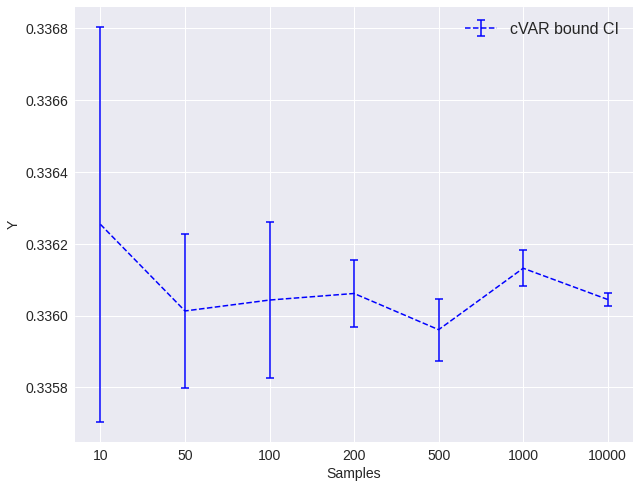

In [39]:
fig =  plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('Samples', fontsize = 14)
ax.set_ylabel('Y', fontsize = 14)
ax.yaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(labelsize=14)
# ax.axis([0, 5, 0, 35])
linestyle = {"linestyle":"--", "linewidth":1.5, "markeredgewidth":1.5, "elinewidth":1.5, "capsize":4}
ax.errorbar([str(N_seq[i]) for i in range(len(N_seq))], LB_seq, yerr = LB_ci, color="b", **linestyle)
ax.legend(['cVAR bound CI'], fontsize  = 16)
plt.show()

## One quality measure, 7 materials, two products with different thermal requirement

### Moreau obj.

In [14]:
#N_seq = [10, 50, 100, 500, 1000, 3000, 5000, 10000, 15000, 20000]; # numb of samples, it overshoot at 3000, not sure why though...
N_seq = [10, 50, 100, 500, 1000] # mu smaller is faster, as the function is getting smoother
M = 10; # numb of replication
alpha = 0.05;
# feasible region of Qx-b1 (first product's bound)
lb1 = 0
ub1 = 10.21
# feasible region of Qy-b2 (2nd product's bound)
lb2=0
ub2=24.03 
seq = np.zeros(len(N_seq));
me_seq = np.zeros(len(N_seq)); 
ci_up_seq = np.zeros(len(N_seq));
ci_low_seq = np.zeros(len(N_seq));
ci= np.zeros(len(N_seq));

x_id = [1,2, 3, 4, 5, 6, 7]
y_id = [1,2, 3, 4, 5, 6, 7]
for s in range(len(N_seq)):
    N = N_seq[s];
    print("######################## Sample size (", N, ") ########################");
    obj = np.zeros(M);
    #UB_obj = np.zeros(M);
    
    # M replication experiments
    for rep_m in trange(M):
        # lower bound ###############################################################################
        # N independent parameter samples
        e1 = np.random.uniform(16.768,16.982,N)
        e2 = np.random.uniform(14.540,15.656, N)
        e3 = np.random.uniform(15.232,17.202,N)
        e4 = np.random.uniform(15.232,17.202,N)
        e5 = np.random.uniform(15.160,17.892,N)
        e6 = np.random.uniform(14.510,17.648,N)
        e7 = np.random.uniform(10.250,13.680,N)
        exp = 0; # each replication
        mu = 0.01 # control step size

        # model
        model = grb.Model('SAA_mor', env = e);
        model.setParam('OutputFlag', 0)
        
        # variables
        x = {}
        y = {}
        # for k in x_id:
        for j in range(N):
          x[1,j] = model.addVar(lb=0,name="x(%s_%s)" % (1,j))
          x[2,j] = model.addVar(lb=0,name="x(%s_%s)" % (2,j))
          x[3,j] = model.addVar(lb=0,name="x(%s_%s)" % (3,j))
          x[4,j] = model.addVar(lb=0,name="x(%s_%s)" % (4,j))
          x[5,j] = model.addVar(lb=0,name="x(%s_%s)" % (5,j))
          x[6,j] = model.addVar(lb=0,name="x(%s_%s)" % (6,j))
          x[7,j] = model.addVar(lb=0,name="x(%s_%s)" % (7,j))

          y[1,j] = model.addVar(lb=0,name="y(%s_%s)" % (1,j))
          y[2,j] = model.addVar(lb=0,name="y(%s_%s)" % (2,j))
          y[3,j] = model.addVar(lb=0,name="y(%s_%s)" % (3,j))
          y[4,j] = model.addVar(lb=0,name="y(%s_%s)" % (4,j))
          y[5,j] = model.addVar(lb=0,name="y(%s_%s)" % (5,j))
          y[6,j] = model.addVar(lb=0,name="y(%s_%s)" % (6,j))
          y[7,j] = model.addVar(lb=0,name="y(%s_%s)" % (7,j))


        model.update()

        # Define Objective & constraints
        for k in range(N):
          t1 = model.addVar()
          model.addConstr(t1 == e1[k]*x[1,k]+e2[k]*x[2,k]+e3[k]*x[3,k]+ e4[k]*x[4,k]+e5[k]*x[5,k]+e6[k]*x[6,k]+e7[k]*x[7,k]-5.75)
          t2 = model.addVar()
          model.addConstr(t2 == e1[k]*y[1,k]+e2[k]*y[2,k]+e3[k]*y[3,k]+ e4[k]*y[4,k]+e5[k]*y[5,k]+e6[k]*y[6,k]+e7[k]*y[7,k]-7.677)
          #max violation
          t = model.addVar() #max violation (compare t1, t2 with baseline, baseline should never be picked, baseline is the lowest Qx-b, this is set such that either t1 or t2 can be picked)
          model.addGenConstrMin(t,[t1,t2],24.03)

          ##Projection of Qx-b to [0,ub]: min{max{Qx-b,lb},ub}
          #max (Qx,lb+b) = u
          u = model.addVar()
          model.addGenConstrMax(u,[t],lb1) #lb1 and lb2 are the same


          #min (u, ub) = v
          v = model.addVar()
          model.addGenConstrMin(v,[u],ub1) # ub1 is smaller, projecting to the smaller region make it available for all

          ## minimize distance of current Qx-b to projection
          d = model.addVar()
          model.addConstr(d == ((t-v)**2)*mu/2)

          model.addConstr(69.97 * (x[1,k]+y[1,k]) + 56.80 * (x[2,k]+y[2,k]) + 47.89 * (x[3,k]+y[3,k] + x[4,k]+y[4,k] + x[5,k]+y[5,k]) + 54.22 * (x[6,k]+y[6,k]) + 48.99 * (x[7,k]+y[7,k])<= 150, name = "constr1(%s)"%k)
          model.addConstr(x[1,k]+y[1,k]+x[2,k]+y[2,k]+x[3,k]+y[3,k]+x[4,k]+y[4,k]+x[5,k]+y[5,k]+x[6,k]+y[6,k]+x[7,k]+y[7,k]>= 0.3)
          model.addConstr(x[1,k]+y[1,k]<=0.34)
          model.addConstr(x[2,k]+y[2,k]<=0.6)
          model.addConstr(x[3,k]+y[3,k]<=0.11)
          model.addConstr(x[4,k]+y[4,k]<=0.27)
          model.addConstr(x[5,k]+x[5,k]<=0.25)
          model.addConstr(x[6,k]+x[6,k]<=0.34)
          model.addConstr(x[7,k]+x[7,k]<=0.099)

        ds = model.getVars()
        model.setObjective(grb.quicksum(ds)*1.0/N, grb.GRB.MINIMIZE)

        model.setParam('NonConvex', 2)
        model.optimize()

        xval ={}
        for i,xv in enumerate(x_id):
            xval[xv] = model.getAttr('x', x).values()[i];
        yval ={}
        for i,yv in enumerate(y_id):
            yval[yv] = model.getAttr('x', y).values()[i];

        exp = model.objVal;
        obj[rep_m] = exp;
        print(xval)
        print(yval)

    seq[s] = sum(obj)*1.0/M;
    print("Moreau Bound = ", seq[s]);
    var = sum([np.square(obj[k]-seq[s]) for k in range(M)]) *1.0/(M-1);
    print("Moreau Bound Variance = ", var);
    # marginal error
    me = (stat.norm.ppf(1-alpha)*np.power(var,1/2))*1.0/(np.power(M,1)/2);
    ci[s] = me
    ci_up_seq[s]  = seq[s] + me;
    ci_low_seq[s] = seq[s] - me;
    print("CI of Moreau Bound = [", ci_low_seq[s]," , ", ci_up_seq[s],"]");


######################## Sample size ( 10 ) ########################


  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.2242656571063772, 5: 0.125, 6: 0.0, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.045734342893622826, 5: 0.07477967797175787, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.2286513604088225, 5: 0.125, 6: 0.0, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.041348639591177544, 5: 0.07927170200616454, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.21534929625280505, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.125, 6: 0.0, 7: 0.0}
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.45319777034955566, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.11480616061137372, 2: 0.0, 3: 0.11, 4: 0.0, 5: 0.125, 6: 0.0, 7: 0.0}
{1: 0.2251938393886263, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.23974461448771467, 6: 0.0, 7:

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.002641893255520815, 7: 0.0}
{1: 0.0, 2: 0.0, 3: 0.11, 4: 0.0, 5: 0.0, 6: 0.3505343939828725, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.20808618666478165, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.125, 6: 0.0, 7: 0.0}
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.4322264930461435, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.16365795948913772, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.17, 7: 0.0}
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.4372291855300182, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.05735558502425207, 2: 0.0, 3: 0.11, 4: 0.0, 5: 0.0, 6: 0.17, 7: 0.0}
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.44978526154953036, 7: 0.0}
Academic license - for non-commercial use only 

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.1023278062077552, 2: 0.0, 3: 0.11, 4: 0.0, 5: 0.125, 6: 0.0, 7: 0.0}
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.44956583366120395, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.21148479293187933, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.125, 6: 0.0, 7: 0.0}
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.4427723479576503, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.22221138159746384, 5: 0.125, 6: 0.0, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.047788618402536176, 5: 0.06946814841435066, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.266415700866223, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.08070072377056396, 6: 0.0, 7: 0.0}
{1: 0.07358429913377702, 2: 0.0, 3: 0.11, 4: 0.27, 5: 0.0, 6: 0.0, 7: 0.0}
Academic lice

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.1620295240845906, 5: 0.0, 6: 0.17, 7: 0.0}
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.43931989805099253, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.24001968190354922, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.10995796687607008, 6: 0.0, 7: 0.0}
{1: 0.09998031809645079, 2: 0.0, 3: 0.11, 4: 0.27, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.1799343869282097, 5: 0.0, 6: 0.17, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.09006561307179031, 5: 0.0, 6: 0.028133068480028098, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.1829060528244926, 5: 0.0, 6: 0.17, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.08709394717550742, 5: 0.0, 6: 0.0313234386955067, 7: 0.0}


  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0354862042415332, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.125, 6: 0.17, 7: 0.0}
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.43883970991951926, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.254484338842893, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.09545522135647043, 6: 0.0, 7: 0.0}
{1: 0.085515661157107, 2: 0.0, 3: 0.11, 4: 0.27, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.20816644588231736, 5: 0.125, 6: 0.0, 7: 0.0}
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.43850819071538283, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.17637098270542317, 5: 0.0, 6: 0.17, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.09362901729457684, 5: 0.0, 6: 0.02120592971179034, 7: 0.0}
Academic license

#### CI plot

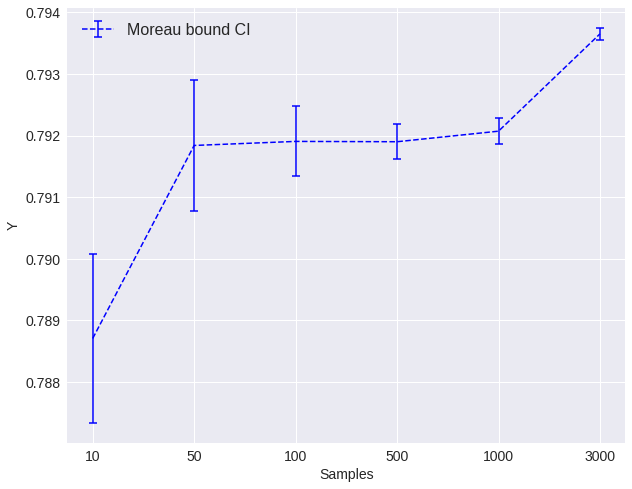

In [13]:
fig =  plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('Samples', fontsize = 14)
ax.set_ylabel('Y', fontsize = 14)
ax.yaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(labelsize=14)
# ax.axis([0, 5, 0, 35])
linestyle = {"linestyle":"--", "linewidth":1.5, "markeredgewidth":1.5, "elinewidth":1.5, "capsize":4}
ax.errorbar([str(N_seq[i]) for i in range(len(N_seq))], seq, yerr = ci, color="b", **linestyle)
ax.legend(['Moreau bound CI'], fontsize  = 16)
plt.show()

### cVAR obj

In [13]:
#N_seq = [10, 50, 100]; # number of samples
N_seq = [10, 50, 100, 200, 500, 1000, 10000]; # numb of samples
M = 10; # numb of replication
Nprim = 1000;
alpha = 0.05;
eps = 0.0001;

LB_seq = np.zeros(len(N_seq));
LB_me_seq = np.zeros(len(N_seq)); 
LB_ci_up_seq = np.zeros(len(N_seq));
LB_ci_low_seq = np.zeros(len(N_seq));
LB_ci= np.zeros(len(N_seq));

x_id = [1,2,3,4,5,6,7]
y_id = [1,2,3,4,5,6,7]
for s in range(len(N_seq)):
    N = N_seq[s];
    print("######################## Sample size (", N, ") ########################");
    LB_obj = np.zeros(M);
    UB_obj = np.zeros(M);
    
    # M replication experiments
    for rep_m in trange(M):
        # lower bound ###############################################################################
        # N independent parameter samples
        e1 = np.random.uniform(16.768,16.982,N)
        e2 = np.random.uniform(14.540,15.656, N)
        e3 = np.random.uniform(15.232,17.202,N)
        e4 = np.random.uniform(15.232,17.202,N)
        e5 = np.random.uniform(15.160,17.892,N)
        e6 = np.random.uniform(14.510,17.648,N)
        e7 = np.random.uniform(10.250,13.680,N)
        LB_exp = 0; # each replication
        
        # model
        LB_model = grb.Model('SAA_LB',e);
        LB_model.setParam('OutputFlag', 0)
        
        # variables
        x = {}
        y = {}
        # for k in x_id:
        for j in range(N):
          x[1,j] = LB_model.addVar(lb=0,ub=0.34,name="x(%s_%s)" % (1,j))
          x[2,j] = LB_model.addVar(lb=0,ub=0.60,name="x(%s_%s)" % (2,j))
          x[3,j] = LB_model.addVar(lb=0,ub=0.11,name="x(%s_%s)" % (3,j))
          x[4,j] = LB_model.addVar(lb=0,ub=0.27,name="x(%s_%s)" % (4,j))
          x[5,j] = LB_model.addVar(lb=0,ub=0.25,name="x(%s_%s)" % (5,j))
          x[6,j] = LB_model.addVar(lb=0,ub=0.34,name="x(%s_%s)" % (6,j))
          x[7,j] = LB_model.addVar(lb=0,ub=0.099,name="x(%s_%s)" % (7,j))

          y[1,j] = LB_model.addVar(lb=0,ub=0.34,name="y(%s_%s)" % (1,j))
          y[2,j] = LB_model.addVar(lb=0,ub=0.60,name="y(%s_%s)" % (2,j))
          y[3,j] = LB_model.addVar(lb=0,ub=0.11,name="y(%s_%s)" % (3,j))
          y[4,j] = LB_model.addVar(lb=0,ub=0.27,name="y(%s_%s)" % (4,j))
          y[5,j] = LB_model.addVar(lb=0,ub=0.25,name="y(%s_%s)" % (5,j))
          y[6,j] = LB_model.addVar(lb=0,ub=0.34,name="y(%s_%s)" % (6,j))
          y[7,j] = LB_model.addVar(lb=0,ub=0.099,name="y(%s_%s)" % (7,j))

        LB_model.update()

        # Define Objective & constraints
        for k in range(N):
          t1 = LB_model.addVar()
          LB_model.addConstr(t1 == e1[k]*x[1,k]+e2[k]*x[2,k]+e3[k]*x[3,k]+ e4[k]*x[4,k]+e5[k]*x[5,k]+e6[k]*x[6,k]+e7[k]*x[7,k]-5.75+eps)
          t2 = LB_model.addVar()
          LB_model.addConstr(t1 == e1[k]*y[1,k]+e2[k]*y[2,k]+e3[k]*y[3,k]+ e4[k]*y[4,k]+e5[k]*y[5,k]+e6[k]*y[6,k]+e7[k]*y[7,k]-7.677+eps)

          #max
          u = LB_model.addVar()
          LB_model.addGenConstrMax(u,[t1,t2],0)
          ue = LB_model.addVar()
          LB_model.addConstr(ue == u/eps)

          LB_model.addConstr(69.97 * (x[1,k]+y[1,k]) + 56.80 * (x[2,k]+y[2,k]) + 47.89 * (x[3,k]+y[3,k] + x[4,k]+y[4,k] + x[5,k]+y[5,k]) + 54.22 * (x[6,k]+y[6,k]) + 48.99 * (x[7,k]+y[7,k])<= 120, name = "constr1(%s)"%k)
          LB_model.addConstr(x[1,k]+y[1,k]+x[2,k]+y[2,k]+x[3,k]+y[3,k]+x[4,k]+y[4,k]+x[5,k]+y[5,k]+x[6,k]+y[6,k]+x[7,k]+y[7,k]>= 0.3)

        ues = LB_model.getVars()
        LB_model.setObjective(grb.quicksum(ues) * 1/N, grb.GRB.MINIMIZE)

        LB_model.optimize()
        xval ={}
        for i,xv in enumerate(x_id):
            xval[xv] = LB_model.getAttr('x', x).values()[i];

        yval ={}
        for i,yv in enumerate(y_id):
            yval[yv] = LB_model.getAttr('x', y).values()[i];

        LB_exp = LB_model.objVal;
        LB_obj[rep_m] = LB_exp;
        print(xval)
        print(yval)

    LB_seq[s] = sum(LB_obj)*1.0/M;
    print("Lower Bound = ", LB_seq[s]);
    LB_var = sum([np.square(LB_obj[k]-LB_seq[s]) for k in range(M)]) *1.0/(M-1);
    print("Lower Bound Variance = ", LB_var);
    # marginal error
    LB_me = (stat.norm.ppf(1-alpha)*np.power(LB_var,1/2))*1.0/(np.power(M,1)/2);
    LB_ci[s] = LB_me
    LB_ci_up_seq[s]  = LB_seq[s] + LB_me;
    LB_ci_low_seq[s] = LB_seq[s] - LB_me;
    print("CI of Lower Bound = [", LB_ci_low_seq[s]," , ", LB_ci_up_seq[s],"]");


######################## Sample size ( 10 ) ########################


  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0685347674719905, 2: 0.0, 3: 0.0, 4: 0.27, 5: 0.0, 6: 0.0, 7: 0.0}
{1: 0.18301838203032889, 2: 0.0, 3: 0.0, 4: 0.27, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.08665141122313336, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
{1: 0.0909775733428401, 2: 0.0, 3: 0.11, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.3274735919653578, 7: 0.0}
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.09762138592997126, 6: 0.34, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.08609314620311861, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
{1: 0.20046137416955195, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only 

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.3343515340166457, 7: 0.0}
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.10696344890660388, 5: 0.0, 6: 0.34, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.07441198001704284, 7: 0.0}
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.1855613773569782, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.3288336162797576, 7: 0.0}
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.10091963678262529, 6: 0.34, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0012480056328026687, 6: 0.0, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.11953058387249707, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only 

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33977825131979333, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.11, 4: 0.0, 5: 0.008226571394614772, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.00010010648423174065, 5: 0.0, 6: 0.0, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.1172868337646624, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.07632587085881284, 7: 0.0}
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.18890258079981895, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.2295971960018947, 2: 0.0, 3: 0.11, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.11, 4: 0.0, 5: 0.004296394695649667, 6: 0.0, 7: 0.0}
Academic license - for non-commercial us

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0015827774156961956, 6: 0.0, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.12006420680210449, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.002719837360833215, 5: 0.0, 6: 0.0, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.11970498714289822, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.07498604609431389, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
{1: 0.07882405907794264, 2: 0.0, 3: 0.11, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.002575118162760436, 6: 0.0, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.11758807368139493, 6: 0.0, 7: 0.0}
Academic license - for non-commercial u

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0820086400965683, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
{1: 0.19662212479648036, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.07766722248204538, 7: 0.0}
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.189781285662323, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.0022740146794886897, 5: 0.0, 6: 0.0, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.1225206794893123, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.06892597389056733, 4: 0.27, 5: 0.0, 6: 0.0, 7: 0.0}
{1: 0.07296081811045303, 2: 0.0, 3: 0.11, 4: 0.27, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use onl

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.11, 4: 0.2257690268053936, 5: 0.0, 6: 0.0, 7: 0.0}
{1: 0.06971181585759947, 2: 0.0, 3: 0.11, 4: 0.27, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.11, 4: 0.0, 5: 0.22504853623262241, 6: 0.0, 7: 0.0}
{1: 0.0, 2: 0.0, 3: 0.11, 4: 0.08916546461974462, 5: 0.25, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.00029703048197350846, 5: 0.0, 6: 0.0, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.11816543579895032, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.08546951758050862, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
{1: 0.19926899921367147, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
Academic license - for non-commercial us

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0743129035202098, 7: 0.0}
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.1842090389119813, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.07885983588514063, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
{1: 0.19267009215097913, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.08157532060880628, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
{1: 0.1963093816896175, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3390637735468062, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.11, 4: 0.0034553030021113747, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only

### CI plot

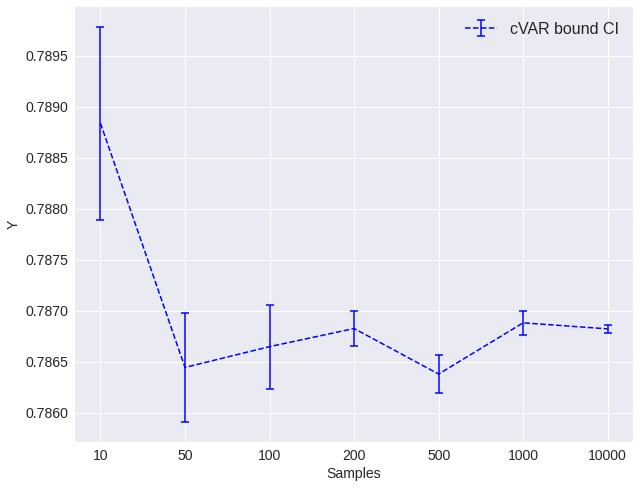

In [14]:
fig =  plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('Samples', fontsize = 14)
ax.set_ylabel('Y', fontsize = 14)
ax.yaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(labelsize=14)
# ax.axis([0, 5, 0, 35])
linestyle = {"linestyle":"--", "linewidth":1.5, "markeredgewidth":1.5, "elinewidth":1.5, "capsize":4}
ax.errorbar([str(N_seq[i]) for i in range(len(N_seq))], LB_seq, yerr = LB_ci, color="b", **linestyle)
ax.legend(['cVAR bound CI'], fontsize  = 16)
plt.show()

### ash content, thermal content
easily exceed free-licence limit if use cvaR obj.

In [6]:
N_seq = [10, 20, 30]; # number of samples
#N_seq = [10 50 100 200 500 1000]; # numb of samples
M = 10; # numb of replication
alpha = 0.05;
eps = 0.01;

LB_seq = np.zeros(len(N_seq));
LB_me_seq = np.zeros(len(N_seq)); 
LB_ci_up_seq = np.zeros(len(N_seq));
LB_ci_low_seq = np.zeros(len(N_seq));
LB_ci= np.zeros(len(N_seq));

x_id = [1,2]
for s in range(len(N_seq)):
    N = N_seq[s];
    print("######################## Sample size (", N, ") ########################");
    LB_obj = np.zeros(M);
    UB_obj = np.zeros(M);
    
    # M replication experiments
    for rep_m in trange(M):
        # lower bound ###############################################################################
        # N independent parameter samples
        e1t = np.random.uniform(16.768,16.982,N)
        e2t = np.random.uniform(14.540,15.656, N)
        e1a = np.random.uniform(0.30,0.75,N)
        e2a = np.random.uniform(0.1,1.13,N)
        LB_exp = 0; # each replication
        
        # model
        LB_model = grb.Model('SAA_LB');
        LB_model.setParam('OutputFlag', 0)
        
        # variables
        x = {}
        # for k in x_id:
        for j in range(N):
          x[1,j] = LB_model.addVar(lb=0,ub=0.34,name="x(%s_%s)" % (1,j))
          x[2,j] = LB_model.addVar(lb=0,ub=0.60,name="x(%s_%s)" % (2,j))


        LB_model.update()

        # Define Objective & constraints
        for k in range(N):
          t = LB_model.addVar()
          a = LB_model.addVar()
          LB_model.addConstr(t == e1t[k]*x[1,k]+e2t[k]*x[2,k]-5.75+eps)
          LB_model.addConstr(a== (1-e1a[k])*x[1,k]+(1-e2a[k])*x[2,k] + eps)

          #max
          u = LB_model.addVar()
          LB_model.addGenConstrMax(u,[t],0)
          ue = LB_model.addVar()
          LB_model.addConstr(ue == u/eps)
          v = LB_model.addVar()
          LB_model.addGenConstrMax(v,[a],0)
          ve = LB_model.addVar()
          LB_model.addConstr(ve == v/eps)

          LB_model.addConstr(69.97 * x[1,k] + 56.80 * x[2,k]<= 50, name = "constr1(%s)"%k)
          LB_model.addConstr(x[1,k]+x[2,k]>= 0.3)

        ues = LB_model.getVars()
        ves = LB_model.getVars()
        LB_model.setObjective(grb.quicksum( ues + ves)*1.0/N, grb.GRB.MAXIMIZE)
        LB_model.setParam('NonConvex', 2)

        LB_model.optimize()
        xval ={}
        for i,xv in enumerate(x_id):
            xval[xv] = LB_model.getAttr('x', x).values()[i];
        LB_exp = LB_model.objVal;
        LB_obj[rep_m] = LB_exp;
        print(xval)

    LB_seq[s] = sum(LB_obj)*1.0/M;
    print("Lower Bound = ", LB_seq[s]);
    LB_var = sum([np.square(LB_obj[k]-LB_seq[s]) for k in range(M)]) *1.0/(M-1);
    print("Lower Bound Variance = ", LB_var);
    # marginal error
    LB_me = (stat.norm.ppf(1-alpha)*np.power(LB_var,1/2))*1.0/(np.power(M,1)/2);
    LB_ci[s] = LB_me
    LB_ci_up_seq[s]  = LB_seq[s] + LB_me;
    LB_ci_low_seq[s] = LB_seq[s] - LB_me;
    print("CI of Lower Bound = [", LB_ci_low_seq[s]," , ", LB_ci_up_seq[s],"]");


######################## Sample size ( 10 ) ########################


  0%|          | 0/10 [00:00<?, ?it/s]

Restricted license - for non-production use only - expires 2023-10-25
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
Lower Bound =  1.6550521652136632
Lower Bound Variance =  0.0
CI of Lower Bound = [ 1.6550521652136632  ,  1.6550521652136632 ]
######################## Sample size ( 20 ) ########################


  0%|          | 0/10 [00:00<?, ?it/s]

{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
Lower Bound =  1.6550521652136632
Lower Bound Variance =  0.0
CI of Lower Bound = [ 1.6550521652136632  ,  1.6550521652136632 ]
######################## Sample size ( 30 ) ########################


  0%|          | 0/10 [00:00<?, ?it/s]

{1: 0.22752608260683155, 2: 0.6}
{1: 0.22752608260683155, 2: 0.6}
{1: 0.22752608260683155, 2: 0.6}
{1: 0.22752608260683155, 2: 0.6}
{1: 0.22752608260683155, 2: 0.6}
{1: 0.22752608260683155, 2: 0.6}
{1: 0.22752608260683155, 2: 0.6}
{1: 0.22752608260683155, 2: 0.6}
{1: 0.22752608260683155, 2: 0.6}
{1: 0.22752608260683155, 2: 0.6}
Lower Bound =  1.6550521652136632
Lower Bound Variance =  0.0
CI of Lower Bound = [ 1.6550521652136632  ,  1.6550521652136632 ]


In [7]:
e = grb.Env(empty=True)
e.setParam('WLSACCESSID', '131fb46b-840e-4bdd-b247-328a0ea76dc1')
e.setParam('WLSSECRET', 'ae3c256c-b280-400a-8287-ecf96c8ddf8e')
e.setParam('LICENSEID', 801091)
e.start()

# Create the model within the Gurobi environment
model = grb.Model(env=e)

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
